In [1]:
import pandas as pd
import json
import requests
import matplotlib.pyplot as plt
%matplotlib inline

<b>Get the Brazilian Working-Age and Workforce Population data and save as json files

In [ ]:
# Table '1641': Working-Age Population: It's defined as those aged 14 and over (PIA - População em Idade Ativa)
# Table '4090': Workforce Population: Include those aged 14 years and over who worked in 2018

table_list = ['1641', '4090']
for table_code in table_list:
    try:
        url = 'http://api.sidra.ibge.gov.br/values/t/4093/p/201801-201804/v/{}/c2/6794/n1/1/n2/1,2,3,4,5'.format(table_code)
        r = requests.get(url)
        data = r.json()
        filename = 'table_{}.json'.format(table_code)
      
        with open(filename, 'w') as outfile:
            json.dump(data, outfile, indent=4)
    except:
        pass

<b>Read the working age and workforce json files created

In [3]:
df_working_age = pd.read_json('table_1641.json')
df_workforce = pd.read_json('table_4090.json')

In [19]:
df_working_age.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 3 columns):
quarter             24 non-null object
region              24 non-null object
population_x1000    24 non-null int32
dtypes: int32(1), object(2)
memory usage: 352.0+ bytes


In [4]:
# Show the first 5 lines of the dataframe

df_working_age.head(5)

,NC,NN,D1C,D1N,D2C,D2N,D3C,D3N,D4C,D4N,MC,MN,V
0,Nível Territorial (Código),Nível Territorial,Trimestre (Código),Trimestre,Variável (Código),Variável,Sexo (Código),Sexo,Brasil e Grande Região (Código),Brasil e Grande Região,Unidade de Medida (Código),Unidade de Medida,Valor
1,1,Brasil,201801,1º trimestre 2018,1641,Pessoas de 14 anos ou mais de idade,6794,Total,1,Brasil,1572,Mil pessoas,168508
2,2,Grande Região,201801,1º trimestre 2018,1641,Pessoas de 14 anos ou mais de idade,6794,Total,1,Norte,1572,Mil pessoas,13599
3,2,Grande Região,201801,1º trimestre 2018,1641,Pessoas de 14 anos ou mais de idade,6794,Total,2,Nordeste,1572,Mil pessoas,44992
4,2,Grande Região,201801,1º trimestre 2018,1641,Pessoas de 14 anos ou mais de idade,6794,Total,3,Sudeste,1572,Mil pessoas,72476


<b>Cleaning Dataset

In [5]:
# Delete uncessary columns, rename columns and data in the two dataframes at the same time

groupDF = [df_working_age, df_workforce]

for i in groupDF:
    i.drop(i.columns[[0,1,3,4,5,6,8,10,11]], axis=1, inplace=True)
    i.drop([0], inplace=True)
    i.columns = ['quarter', 'gender', 'region', 'population_x1000']
    i.replace({'quarter': '201701'}, {'quarter': '2017Q1'}, inplace=True)
    i.replace({'quarter': '201702'}, {'quarter': '2017Q2'}, inplace=True)
    i.replace({'quarter': '201703'}, {'quarter': '2017Q3'}, inplace=True)
    i.replace({'quarter': '201704'}, {'quarter': '2017Q4'}, inplace=True)
    i.replace({'quarter': '201801'}, {'quarter': '2018Q1'}, inplace=True)
    i.replace({'quarter': '201802'}, {'quarter': '2018Q2'}, inplace=True)
    i.replace({'quarter': '201803'}, {'quarter': '2018Q3'}, inplace=True)
    i.replace({'quarter': '201804'}, {'quarter': '2018Q4'}, inplace=True)
    i = i.reset_index(drop=True, inplace=True)

In [6]:
# Change datatype of column 'population_x1000' in dataframes

df_working_age['population_x1000'] = df_working_age.population_x1000.astype(int)
df_workforce['population_x1000'] = df_workforce.population_x1000.astype(int)

In [7]:
# Delete 'gender' column from dataframes

df_working_age.drop('gender', axis=1, inplace=True)
df_workforce.drop('gender', axis=1, inplace=True)

In [8]:
df_working_age.head(5)

,quarter,region,population_x1000
0,2018Q1,Brasil,168508
1,2018Q1,Norte,13599
2,2018Q1,Nordeste,44992
3,2018Q1,Sudeste,72476
4,2018Q1,Sul,24572


In [9]:
df_workforce.head(6)

,quarter,region,population_x1000
0,2018Q1,Brasil,90272
1,2018Q1,Norte,7072
2,2018Q1,Nordeste,20662
3,2018Q1,Sudeste,40633
4,2018Q1,Sul,14406
5,2018Q1,Centro-Oeste,7499


In [10]:
# Create a new dataframe to calculate the Employment-to-Population Ratio. It is calculated by dividing the workforce
# population by the working age population. It's used as a metric of labor and unemployment.

data = [['2018Q1','Brasil'], ['2018Q1','Norte'], ['2018Q1','Nordeste'], ['2018Q1','Sudeste'], ['2018Q1','Sul'],['2018Q1', 'Centro-Oeste'],
        ['2018Q2','Brasil'], ['2018Q2','Norte'], ['2018Q2','Nordeste'], ['2018Q2','Sudeste'], ['2018Q2','Sul'],['2018Q2', 'Centro-Oeste'],
        ['2018Q3','Brasil'], ['2018Q3','Norte'], ['2018Q3','Nordeste'], ['2018Q3','Sudeste'], ['2018Q3','Sul'],['2018Q3', 'Centro-Oeste'],
        ['2018Q4','Brasil'], ['2018Q4','Norte'], ['2018Q4','Nordeste'], ['2018Q4','Sudeste'], ['2018Q4','Sul'],['2018Q4', 'Centro-Oeste']]

df_empl_ratio = pd.DataFrame(data, columns = ['quarter', 'region']) 

df_empl_ratio['ratio'] = ((df_workforce['population_x1000']/df_working_age['population_x1000'])*100).round(2)

In [11]:
df_empl_ratio.head(5)

,quarter,region,ratio
0,2018Q1,Brasil,53.57
1,2018Q1,Norte,52.00
2,2018Q1,Nordeste,45.92
3,2018Q1,Sudeste,56.06
4,2018Q1,Sul,58.63


In [12]:
# creating a pivot table of the working age population in Brazil per region and total

df_working_age.pivot_table(index=['quarter'], columns='region', values='population_x1000')

region,Brasil,Centro-Oeste,Nordeste,Norte,Sudeste,Sul
quarter,,,,,,
2018Q1,168508,12869,44992,13599,72476,24572
2018Q2,169241,12882,45228,13693,72817,24621
2018Q3,169734,12929,45333,13771,73028,24672
2018Q4,170022,12936,45305,13822,73189,24771


In [13]:
# creating a pivot table of the Population in workforce in Brazil per region and total

df_workforce.pivot_table(index=['quarter'], columns='region', values='population_x1000')

region,Brasil,Centro-Oeste,Nordeste,Norte,Sudeste,Sul
quarter,,,,,,
2018Q1,90272,7499,20662,7072,40633,14406
2018Q2,90941,7624,20761,7147,41039,14371
2018Q3,92333,7736,21254,7272,41576,14495
2018Q4,92736,7800,21253,7326,41634,14723


In [25]:
# Create a pivot table of the Employment-to-Population Ratio

df_empl_ratio.pivot_table(index=['region'], columns='quarter', values='ratio')

quarter,2018Q1,2018Q2,2018Q3,2018Q4
region,,,,
Brasil,53.57,53.73,54.40,54.54
Centro-Oeste,58.27,59.18,59.83,60.30
Nordeste,45.92,45.90,46.88,46.91
Norte,52.00,52.19,52.81,53.00
Sudeste,56.06,56.36,56.93,56.89
Sul,58.63,58.37,58.75,59.44


In [26]:
# Define a new variable to plot the employment-to-population ratio

df_plot = df_empl_ratio.pivot_table(index=['quarter'], columns='region', values='ratio')

<Figure size 1080x864 with 0 Axes>

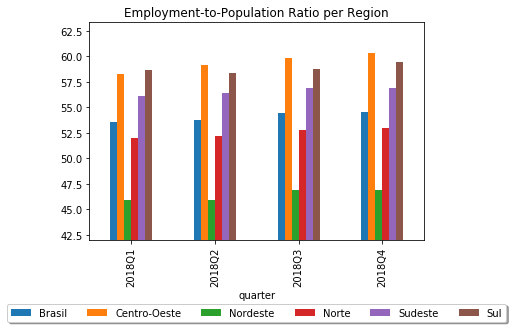

In [27]:
# Plot the graph Employment-to-Population Ration per Region

fig = plt.figure(figsize = (15,12))
grid_size = (3,2)

df_plot.plot(kind='bar', ylim=42, title='Employment-to-Population Ratio per Region')
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.4),fancybox=True, shadow=True, ncol=6)

In [28]:
# Save the graph as png file

plt.savefig('graph_ratio.png')

<Figure size 432x288 with 0 Axes>